In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest

## Step 1: Load Data and Initial Exploration


In [2]:
data = pd.read_csv("D:/harish/templates/traces_data.csv")
print(data.head(5))  


  Timestamp                           traceID            spanID  \
0   42:32.7  d8d992638d73274d0a6710a1f9d17f93  0d87dcf5ea5aeaab   
1   42:32.7  d8d992638d73274d0a6710a1f9d17f93  bd0a6f75f1a901b7   
2   42:33.9  fab7ab123d61c8d7d71062fc44ffb87e  fe4acd4c8a763d24   
3   42:36.9  39a34f6b196aa69cdd5364bfc73b35b4  b3c68f9f4a73524b   
4   42:39.9  61e0ffa4c695a832b05f406999cf319c  b204b9bce1b3ac35   

       parentSpanID         serviceName  \
0               NaN  featureflagservice   
1  0d87dcf5ea5aeaab  featureflagservice   
2               NaN      frontend-proxy   
3               NaN      frontend-proxy   
4               NaN      frontend-proxy   

                                         Name   durationNano  
0                                           /         887477  
1  featureflagservice.repo.query:featureflags         481634  
2                                     ingress         213000  
3                                     ingress         602000  
4                      

## Replace leading spaces in column names

In [3]:
data.columns = data.columns.str.strip()
print(data)

       Timestamp                           traceID            spanID  \
0        42:32.7  d8d992638d73274d0a6710a1f9d17f93  0d87dcf5ea5aeaab   
1        42:32.7  d8d992638d73274d0a6710a1f9d17f93  bd0a6f75f1a901b7   
2        42:33.9  fab7ab123d61c8d7d71062fc44ffb87e  fe4acd4c8a763d24   
3        42:36.9  39a34f6b196aa69cdd5364bfc73b35b4  b3c68f9f4a73524b   
4        42:39.9  61e0ffa4c695a832b05f406999cf319c  b204b9bce1b3ac35   
...          ...                               ...               ...   
183610   44:52.0  cc3f285a2ef094d4ba7582b1d5d47882  ebf0df7adc41ca4d   
183611   44:54.1  be4a70fee4913f3cf56b1c64228bcdb5  0975afe20d7368d2   
183612   44:54.1  be4a70fee4913f3cf56b1c64228bcdb5  96139b9d0d16639a   
183613   44:54.1  be4a70fee4913f3cf56b1c64228bcdb5  b1321d3db08e86d3   
183614   44:54.1  be4a70fee4913f3cf56b1c64228bcdb5  ae64d281880bfed7   

            parentSpanID            serviceName  \
0                    NaN     featureflagservice   
1       0d87dcf5ea5aeaab     feat

## Print the DataFrame to verify changes


In [4]:
print(data)

       Timestamp                           traceID            spanID  \
0        42:32.7  d8d992638d73274d0a6710a1f9d17f93  0d87dcf5ea5aeaab   
1        42:32.7  d8d992638d73274d0a6710a1f9d17f93  bd0a6f75f1a901b7   
2        42:33.9  fab7ab123d61c8d7d71062fc44ffb87e  fe4acd4c8a763d24   
3        42:36.9  39a34f6b196aa69cdd5364bfc73b35b4  b3c68f9f4a73524b   
4        42:39.9  61e0ffa4c695a832b05f406999cf319c  b204b9bce1b3ac35   
...          ...                               ...               ...   
183610   44:52.0  cc3f285a2ef094d4ba7582b1d5d47882  ebf0df7adc41ca4d   
183611   44:54.1  be4a70fee4913f3cf56b1c64228bcdb5  0975afe20d7368d2   
183612   44:54.1  be4a70fee4913f3cf56b1c64228bcdb5  96139b9d0d16639a   
183613   44:54.1  be4a70fee4913f3cf56b1c64228bcdb5  b1321d3db08e86d3   
183614   44:54.1  be4a70fee4913f3cf56b1c64228bcdb5  ae64d281880bfed7   

            parentSpanID            serviceName  \
0                    NaN     featureflagservice   
1       0d87dcf5ea5aeaab     feat

In [5]:
print(data.info())  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183615 entries, 0 to 183614
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   Timestamp     183615 non-null  object
 1   traceID       183615 non-null  object
 2   spanID        183615 non-null  object
 3   parentSpanID  141834 non-null  object
 4   serviceName   183615 non-null  object
 5   Name          183615 non-null  object
 6   durationNano  183615 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 9.8+ MB
None


## printing  number of column in the data

In [6]:
print(data.columns)

Index(['Timestamp', 'traceID', 'spanID', 'parentSpanID', 'serviceName', 'Name',
       'durationNano'],
      dtype='object')


## E.D.A of the duration column

Text(0, 0.5, 'Frequency')

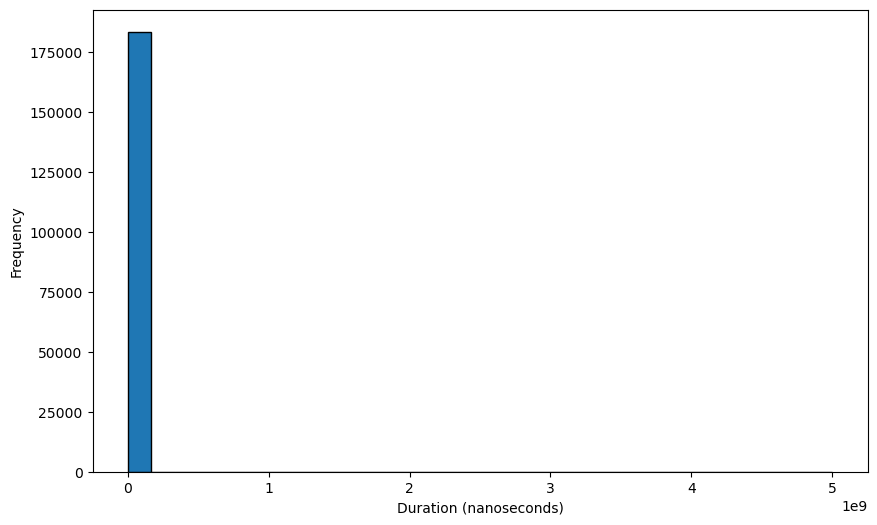

In [7]:
plt.figure(figsize=(10, 6))
plt.hist(data['durationNano'], bins=30, edgecolor='k') 
plt.xlabel('Duration (nanoseconds)')
plt.ylabel('Frequency')



 ## E.D.A of the duration and servicename

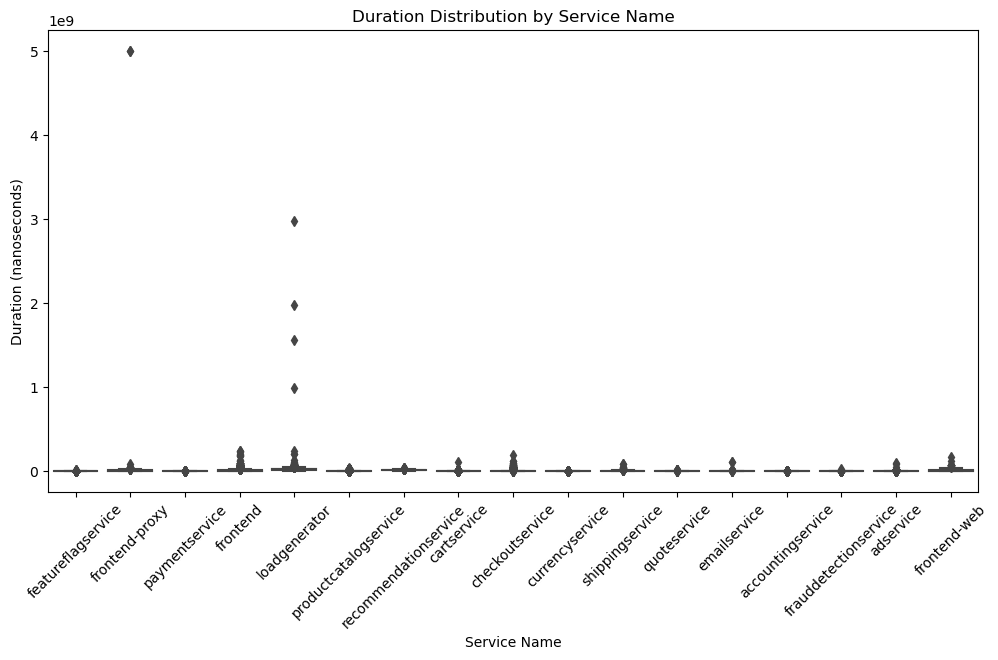

In [10]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x='serviceName', y='durationNano')
plt.title('Duration Distribution by Service Name')
plt.xticks(rotation=45)
plt.xlabel('Service Name')
plt.ylabel('Duration (nanoseconds)')
plt.show()

##  I have used boxplot because It provides a concise summary of the central tendency, variability, and presence of outliers in the data

## E.D.A of the duration and methodname

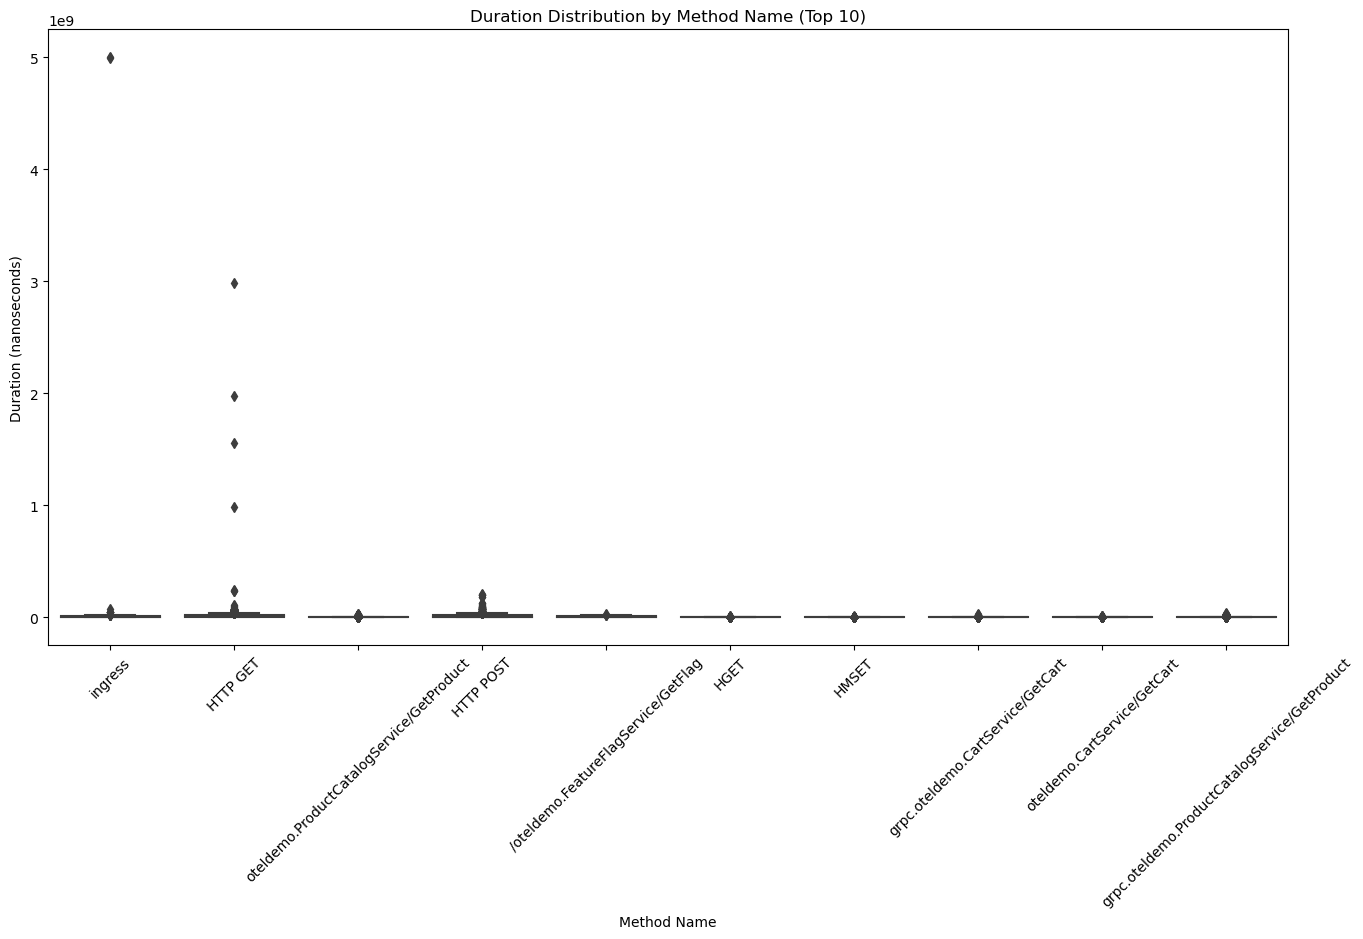

In [13]:
# Filter method names to display only the top N most frequent ones
top_methods = data['Name'].value_counts().nlargest(10).index
df_filtered = data[data['Name'].isin(top_methods)]

# Plotting
plt.figure(figsize=(16, 8))
sns.boxplot(data=df_filtered, x='Name', y='durationNano')
plt.title('Duration Distribution by Method Name (Top 10)')
plt.xticks(rotation=45)
plt.xlabel('Method Name')
plt.ylabel('Duration (nanoseconds)')
plt.show()


## statistics of duration and servicename 

In [14]:
service_duration_stats = data.groupby('serviceName')['durationNano'].describe()  
print(service_duration_stats)

                         count          mean           std        min  \
serviceName                                                             
accountingservice       1004.0  2.234955e+04  1.820005e+04     9712.0   
adservice               3523.0  1.399567e+06  3.365947e+06     3814.0   
cartservice            25834.0  6.614878e+05  9.908042e+05   110300.0   
checkoutservice        13750.0  4.100306e+06  6.845278e+06   163931.0   
currencyservice         2860.0  3.254905e+04  1.183174e+04    12222.0   
emailservice            4016.0  8.898312e+05  2.635908e+06    31193.0   
featureflagservice      7623.0  1.070550e+06  6.424818e+05   292127.0   
frauddetectionservice   1004.0  1.515726e+05  6.851952e+05    72523.0   
frontend               65758.0  6.863503e+06  8.597021e+06     2304.0   
frontend-proxy          4836.0  7.858884e+06  1.016398e+08   109000.0   
frontend-web             230.0  1.305869e+07  2.065598e+07        0.0   
loadgenerator          16852.0  1.847588e+07  3.306

## statistics of duration and Methodname

In [15]:
name_duration_stats = data.groupby('Name')['durationNano'].describe() 
print(name_duration_stats)

                                       count          mean           std  \
Name                                                                       
/                                      289.0  1.053823e+06  3.189593e+05   
/featureflags                            6.0  1.411163e+06  2.268446e+05   
/featureflags/:id                        8.0  2.361267e+06  1.372189e+06   
/featureflags/:id/edit                   4.0  1.784988e+06  1.751426e+05   
/oteldemo.FeatureFlagService/GetFlag  5010.0  4.176101e+06  4.663762e+06   
...                                      ...           ...           ...   
resourceFetch                           34.0  3.148822e+07  2.627118e+07   
send_email                            1004.0  1.397173e+06  3.529035e+06   
sinatra.render_template               2008.0  1.160193e+05  1.414735e+05   
tcp.connect                              3.0  8.383147e+05  8.084493e+05   
{closure}                             1003.0  9.359657e+05  9.134420e+05   

           

## Taking the logarithm of the duration values, incremented by 1, helps normalize the data distribution and stabilize variance. This transformation enhances interpretability by compressing large values and enabling meaningful comparisons. Additionally, it can improve model performance, particularly for algorithms sensitive to non-linear relationships. The increment of 1 ensures validity for zero or near-zero duration values. Overall, this transformation addresses skewness, enhances interpretability, and aids in modeling tasks.

In [16]:
data['durationLog'] = np.log(data['durationNano'] + 1)

In [17]:
print(data['durationLog'])

0         13.696139
1         13.084942
2         12.269052
3         13.308014
4         13.228525
            ...    
183610    13.831691
183611    10.461788
183612    10.152728
183613     8.594525
183614    10.336762
Name: durationLog, Length: 183615, dtype: float64


## 2
For anomaly detection in the duration of a span, one approach could be to use
anomaly detection algorithms such as Isolation Forest, Local Outlier Factor (LOF),
or One-Class SVM (Support Vector Machine). These algorithms are effective in
identifying outliers/anomalies in datasets.

Isolation Forest works well for high-dimensional data and is efficient even
for large datasets. It isolates anomalies by randomly selecting a feature
and then randomly selecting a split value between the maximum and minimum
values of the selected feature. It repeats this process recursively to build
an ensemble of trees, and anomalies are typically isolated in fewer steps
compared to normal instances.

## These approache is suitable for detecting anomalies in the duration of a span
because these do not require labeled data (only normal data is needed for training)
and can handle high-dimensional data effectively, which is often the case in
trace data with multiple features.

In [20]:
data['anomaly'] = isolation_forest.predict(data[['durationLog']])
anomalies = data[data['anomaly'] == -1]

In [19]:
isolation_forest = IsolationForest(contamination=0.01, random_state=42)
isolation_forest.fit(data[['durationLog']])

IsolationForest(contamination=0.01, random_state=42)

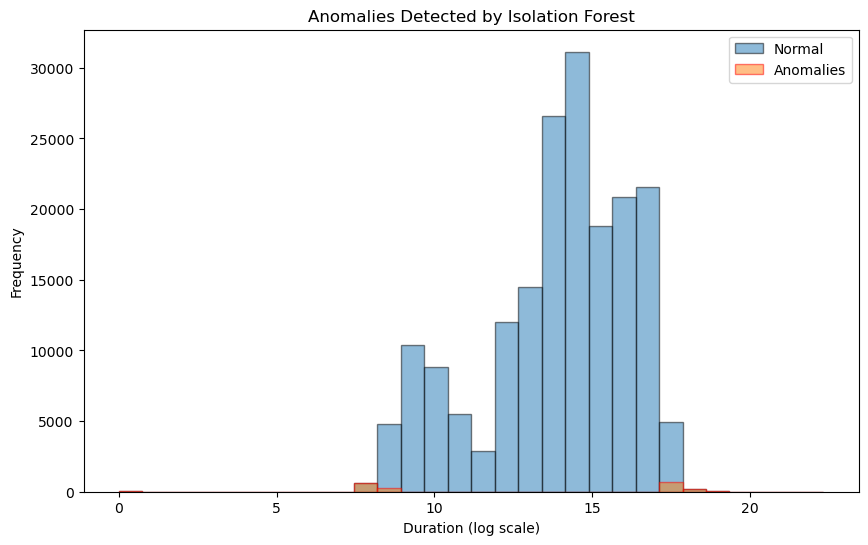

In [21]:
plt.figure(figsize=(10, 6))
plt.hist(data['durationLog'], bins=30, edgecolor='k', alpha=0.5, label='Normal')
plt.hist(anomalies['durationLog'], bins=30, edgecolor='r', alpha=0.5, label='Anomalies')
plt.xlabel('Duration (log scale)')
plt.ylabel('Frequency')
plt.title('Anomalies Detected by Isolation Forest')
plt.legend()
plt.show()

## These approaches are suitable for detecting anomalies in the duration of a span
because they do not require labeled data (only normal data is needed for training)
and can handle high-dimensional data effectively, which is often the case in
trace data with multiple features.

In [22]:
print("Number of anomalies detected:", len(anomalies))

Number of anomalies detected: 1802


## we can see that there are total 1802 anomalies